In [1]:
import pyorc
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
adcp = pd.read_csv('LR_WaterLab_AA_20240604_132107_edited_pp.csv', sep='\t')
adcp = adcp.rename(columns={'Mean Speed (m/s)': 'v_len'})
print(adcp.columns)
adcp

Index(['Transect', 'File Name', 'Start Edge', 'Start Time (UTC-7)', 'Duration',
       'Track (m)', 'DMG (m)', 'Width (m)', 'Area (m²)', 'Boat Speed (m/s)',
       'v_len', 'Left Q (m³/s)', 'Right Q (m³/s)', 'Top Q (m³/s)',
       'Middle Q (m³/s)', 'Bottom Q (m³/s)', 'Total Q (m³/s)',
       'Moving Bed Corrected Q (m³/s)', '% Measured (%)'],
      dtype='object')


,Transect,File Name,Start Edge,Start Time (UTC-7),Duration,Track (m),DMG (m),Width (m),Area (m²),Boat Speed (m/s),v_len,Left Q (m³/s),Right Q (m³/s),Top Q (m³/s),Middle Q (m³/s),Bottom Q (m³/s),Total Q (m³/s),Moving Bed Corrected Q (m³/s),% Measured (%)
0,1,01-Transect_20240604122546,Right Bank,2024-06-04 12:27:00,00:01:18,13.458,10.602,12.002,13.29247,0.1725,2.1546,0.1749,0.1073,5.4344,17.1969,5.7269,28.6404,NaN,60.04
1,2,02-Transect_20240604122819,Left Bank,2024-06-04 12:28:45,00:01:17,13.292,10.708,12.108,12.75269,0.1726,2.2248,0.1703,0.0854,5.5935,16.6335,5.8896,28.3723,NaN,58.63
2,3,03-Transect_20240604123003,Right Bank,2024-06-04 12:30:23,00:01:22,14.224,10.672,12.072,13.05092,0.1735,2.2014,0.0738,0.0846,5.7240,16.4615,6.3870,28.7309,NaN,57.30
3,4,04-Transect_20240604123146,Left Bank,2024-06-04 12:31:55,00:03:07,29.561,10.790,12.190,12.43515,0.1581,2.3505,0.1738,0.0829,5.9060,16.6896,6.3762,29.2284,NaN,57.10
4,5,05-Transect_20240604123503,Right Bank,2024-06-04 12:35:23,00:01:14,12.982,10.647,12.047,13.18070,0.1754,2.1508,0.1725,0.0778,5.4552,16.7559,5.8878,28.3492,NaN,59.11
5,6,07-Transect_20240604123805,Right Bank,2024-06-04 12:38:13,00:01:14,13.843,10.818,12.218,13.03937,0.1871,2.2019,0.1567,0.0837,5.7469,16.6338,6.0903,28.7115,NaN,57.93
6,7,08-Transect_20240604123927,Left Bank,2024-06-04 12:39:34,00:01:19,13.222,10.706,12.106,13.24913,0.1674,2.1820,0.1639,0.0810,5.5893,16.6956,6.3799,28.9097,NaN,57.75
7,8,09-Transect_20240604124054,Right Bank,2024-06-04 12:41:02,00:01:24,14.669,10.697,12.097,13.08408,0.1746,2.1709,0.1579,0.0801,5.5437,16.4299,6.1933,28.4048,NaN,57.84


In [3]:
ds = xr.open_dataset('June/results/video_capture_2024-06-04_13-06-48_velocimetry_results.nc')
ds = ds.mean(dim="time", keep_attrs=True)

df = ds.to_dataframe().reset_index(); ds.close()
df['v_len'] = np.sqrt(df.v_x**2 + df.v_y**2)
df


,y,x,v_x,v_y,s2n,corr,xp,yp,xs,ys,v_len
0,9.645,0.125,NaN,NaN,0.00000,0.00000,-516.845459,-125.344238,4.849573,4.702055,NaN
1,9.645,0.255,NaN,NaN,0.00000,0.00000,-468.762756,-80.596313,4.856762,4.831856,NaN
2,9.645,0.385,NaN,NaN,0.00000,0.00000,-423.157257,-38.153687,4.863951,4.961657,NaN
3,9.645,0.515,NaN,NaN,0.00000,0.00000,-379.842316,2.157104,4.871140,5.091458,NaN
4,9.645,0.645,NaN,NaN,0.00000,0.00000,-338.649628,40.492920,4.878329,5.221259,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11391,0.155,19.495,0.248250,0.042667,2.59120,0.43208,1667.141235,1291.775879,15.396224,23.517611,0.251890
11392,0.155,19.625,0.207440,0.017440,2.63568,0.43288,1665.152832,1293.273438,15.403413,23.647412,0.208172
11393,0.155,19.755,0.073333,0.098583,2.54984,0.43824,1663.186035,1294.754639,15.410602,23.777213,0.122868
11394,0.155,19.885,0.073689,0.109016,2.65936,0.45008,1661.240234,1296.220093,15.417791,23.907014,0.131585


In [4]:
ds = xr.open_dataset('June/results/video_capture_2024-06-04_13-06-48_velocimetry_results.nc')

ds.velocimetry.mask.corr(inplace=True)
ds.velocimetry.mask.minmax(inplace=True)
ds.velocimetry.mask.rolling(inplace=True)
ds.velocimetry.mask.outliers(inplace=True)
ds.velocimetry.mask.variance(inplace=True)
ds.velocimetry.mask.angle(angle_tolerance=0.5*np.pi)
ds.velocimetry.mask.count(inplace=True)
ds.velocimetry.mask.window_mean(wdw=2, inplace=True, tolerance=0.5, reduce_time=True)

ds = ds.mean(dim="time", keep_attrs=True)

df_post = ds.to_dataframe().reset_index(); ds.close()
df_post['v_len'] = np.sqrt(df_post.v_x**2 + df_post.v_y**2)
df_post

/home/waterlab/anaconda3/envs/pyorc/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/waterlab/anaconda3/envs/pyorc/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


,y,x,v_x,v_y,s2n,corr,xp,yp,xs,ys,v_len
0,9.645,0.125,NaN,NaN,NaN,NaN,-516.845459,-125.344238,4.849573,4.702055,NaN
1,9.645,0.255,NaN,NaN,NaN,NaN,-468.762756,-80.596313,4.856762,4.831856,NaN
2,9.645,0.385,NaN,NaN,NaN,NaN,-423.157257,-38.153687,4.863951,4.961657,NaN
3,9.645,0.515,NaN,NaN,NaN,NaN,-379.842316,2.157104,4.871140,5.091458,NaN
4,9.645,0.645,NaN,NaN,NaN,NaN,-338.649628,40.492920,4.878329,5.221259,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11391,0.155,19.495,NaN,NaN,NaN,NaN,1667.141235,1291.775879,15.396224,23.517611,NaN
11392,0.155,19.625,NaN,NaN,NaN,NaN,1665.152832,1293.273438,15.403413,23.647412,NaN
11393,0.155,19.755,NaN,NaN,NaN,NaN,1663.186035,1294.754639,15.410602,23.777213,NaN
11394,0.155,19.885,NaN,NaN,NaN,NaN,1661.240234,1296.220093,15.417791,23.907014,NaN


MEAN VELOCITY
ADCP                    : 2.2046125
PyORC                   : 0.32841408015218226
PyORC w/ post-processing: 0.7648090951537845


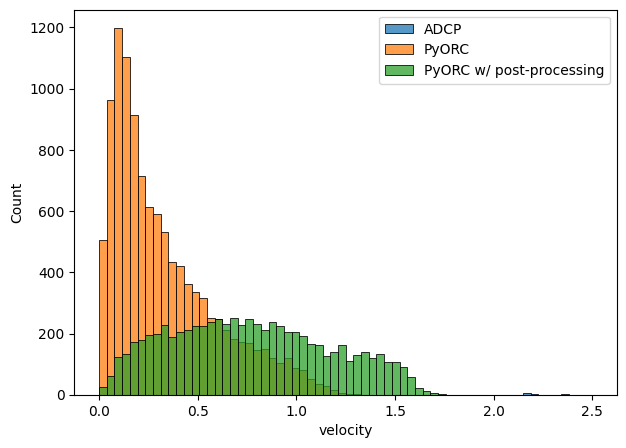

In [5]:
print('MEAN VELOCITY')
print(f'{'ADCP':<24}: {np.mean(adcp['v_len'])}')
print(f'{'PyORC':<24}: {np.mean(df['v_len'])}')
print(f'{'PyORC w/ post-processing':<24}: {np.mean(df_post['v_len'])}')

range = [0,2.5]
n=64

plt.figure(figsize=(7, 5))

sns.histplot(
    data=adcp,
    x='v_len',
    binrange=range,
    bins=n,
    label='ADCP'
)
sns.histplot(
    data=df,
    x='v_len',
    binrange=range,
    bins=n,
    label='PyORC'
)
sns.histplot(
    data=df_post,
    x='v_len',
    binrange=range,
    bins=n,
    label='PyORC w/ post-processing'
)

plt.xlabel('velocity')
plt.legend()